## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow.keras as keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense

## Data Preparing

In [ ]:
df = pd.read_csv("student-mat.csv")
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### data cleaning

In [ ]:
df=df.drop(['school', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher','G1','G3'], axis=1)
df.dtypes

sex           object
age            int64
traveltime     int64
studytime      int64
failures       int64
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G2             int64
dtype: object

In [ ]:
df

,sex,age,traveltime,studytime,failures,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2
0,F,18,2,2,0,no,no,4,3,4,1,1,3,6,6
1,F,17,1,2,0,yes,no,5,3,3,1,1,3,4,5
2,F,15,1,2,3,yes,no,4,3,2,2,3,3,10,8
3,F,15,1,3,0,yes,yes,3,2,2,1,1,5,2,14
4,F,16,1,2,0,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,1,2,2,no,no,5,5,4,4,5,4,11,9
391,M,17,2,1,0,yes,no,2,4,5,3,4,2,3,16
392,M,21,1,1,3,no,no,5,5,3,3,3,3,3,8
393,M,18,3,1,0,yes,no,4,4,1,3,4,5,0,12


### mapping values into binary

In [ ]:
sex_mapping = {"M":0,
                "F":1}
i_r_mapping = {"yes":1,
                "no":0}


In [ ]:
df["sex"]=df["sex"].map(sex_mapping)
df["internet"]=df["internet"].map(i_r_mapping)
df["romantic"]=df["romantic"].map(i_r_mapping)

In [ ]:
df

,sex,age,traveltime,studytime,failures,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2
0,1,18,2,2,0,0,0,4,3,4,1,1,3,6,6
1,1,17,1,2,0,1,0,5,3,3,1,1,3,4,5
2,1,15,1,2,3,1,0,4,3,2,2,3,3,10,8
3,1,15,1,3,0,1,1,3,2,2,1,1,5,2,14
4,1,16,1,2,0,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,20,1,2,2,0,0,5,5,4,4,5,4,11,9
391,0,17,2,1,0,1,0,2,4,5,3,4,2,3,16
392,0,21,1,1,3,0,0,5,5,3,3,3,3,3,8
393,0,18,3,1,0,1,0,4,4,1,3,4,5,0,12


### corelation plot

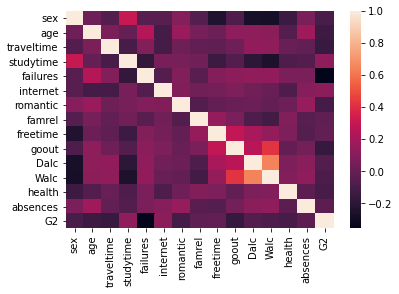

In [ ]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

In [ ]:
X = df.drop("G2", axis=1)
y = df["G2"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## KNN

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN = KNN.fit(X_train,y_train)
mean_squared_error(KNN.predict(X_test), y_test)

18.582278481012658

In [ ]:
param_range = np.linspace(1, 200, 200, dtype=np.int)
scores_train = []
scores_test = []

### counting mse for diffrent values of neighbors

In [ ]:
for param in param_range:
    KNN = KNeighborsClassifier(n_neighbors=param)
    KNN = KNN.fit(X_train,y_train)
    tmp_score = mean_squared_error(KNN.predict(X_test), y_test)
    scores_test.append(tmp_score)
    tmp_score = mean_squared_error(KNN.predict(X_train), y_train)
    scores_train.append(tmp_score)

### making a plot for scores from above

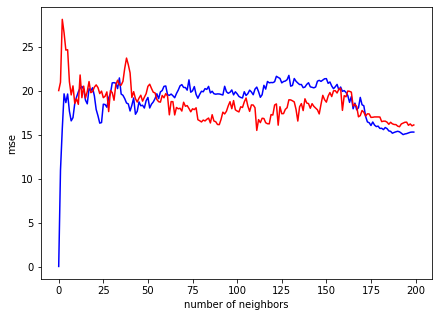

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(scores_train, color= "b")
plt.plot(scores_test, color= "r")

plt.xlabel('number of neighbors')
plt.ylabel('mse')

plt.show()

## Logistic Regression

In [ ]:
lr = LogisticRegression()
standardScaler = StandardScaler()
pca = PCA(n_components=3)

standardScaler = standardScaler.fit(X_train)
pca = pca.fit(standardScaler.transform(X_train))

In [ ]:
lr = lr.fit(pca.transform(standardScaler.transform(X_train)), y_train)
mean_squared_error(lr.predict(pca.transform(standardScaler.transform(X_test))), y_test)

14.455696202531646

## Grid Search for Neural Networks

### model creating for Grid Search

In [ ]:
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(32, input_dim=14, kernel_initializer='uniform', activation=activation))
    model.add(Dense(16,  kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.compile(loss='mse', metrics=[keras.metrics.MeanSquaredError()])
    return model

### making grid of params

In [ ]:
model = KerasRegressor(build_fn=create_model, verbose=0)
activation = ['relu', 'tanh', 'sigmoid']
batch_size = [8, 10, 16]
epochs = [50, 70 , 90, 110]
param_grid = dict(activation=activation, batch_size=batch_size, epochs=epochs)

### fitting  model for our data

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train, validation_data=(X_test,y_test))

### finding best model, and showing results for each

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -12.303624 using {'activation': 'tanh', 'batch_size': 8, 'epochs': 110}
-13.186761 (1.906290) with: {'activation': 'relu', 'batch_size': 8, 'epochs': 50}
-13.143034 (1.766592) with: {'activation': 'relu', 'batch_size': 8, 'epochs': 70}
-13.049473 (1.611281) with: {'activation': 'relu', 'batch_size': 8, 'epochs': 90}
-13.261265 (1.809553) with: {'activation': 'relu', 'batch_size': 8, 'epochs': 110}
-13.639842 (2.416194) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 50}
-13.339516 (1.525336) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 70}
-13.463018 (1.927473) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 90}
-24.710319 (22.514808) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 110}
-14.306123 (2.346553) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 50}
-13.684042 (1.983643) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 70}
-30.463972 (34.559631) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 90}
-13.24919

### extracting best params

In [ ]:
best_activation = grid_result.best_params_['activation']
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']
# best_epochs = 200

### creating model with best params

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=14, kernel_initializer='uniform', activation=best_activation))
model.add(Dense(16,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.compile(loss='mae', metrics=[keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = best_epochs, verbose=1, batch_size=best_batch_size)

Epoch 1/110
40/40 [==============================] - 0s 6ms/step - loss: 10.2415 - mean_squared_error: 118.8720 - val_loss: 10.6545 - val_mean_squared_error: 125.2902
Epoch 2/110
40/40 [==============================] - 0s 2ms/step - loss: 8.5700 - mean_squared_error: 85.9468 - val_loss: 7.8448 - val_mean_squared_error: 72.3005
Epoch 3/110
40/40 [==============================] - 0s 2ms/step - loss: 5.1535 - mean_squared_error: 36.3809 - val_loss: 3.6962 - val_mean_squared_error: 21.3793
Epoch 4/110
40/40 [==============================] - 0s 2ms/step - loss: 3.0219 - mean_squared_error: 14.7943 - val_loss: 2.9381 - val_mean_squared_error: 14.0413
Epoch 5/110
40/40 [==============================] - 0s 2ms/step - loss: 2.9956 - mean_squared_error: 14.6501 - val_loss: 2.9516 - val_mean_squared_error: 14.2364
Epoch 6/110
40/40 [==============================] - 0s 2ms/step - loss: 2.9857 - mean_squared_error: 14.4968 - val_loss: 3.0500 - val_mean_squared_error: 15.1801
Epoch 7/110
40/40 

Epoch 51/110
40/40 [==============================] - 0s 2ms/step - loss: 2.7756 - mean_squared_error: 12.3838 - val_loss: 2.6417 - val_mean_squared_error: 11.4190
Epoch 52/110
40/40 [==============================] - 0s 2ms/step - loss: 2.7779 - mean_squared_error: 12.2536 - val_loss: 2.7552 - val_mean_squared_error: 12.7355
Epoch 53/110
40/40 [==============================] - 0s 2ms/step - loss: 2.7746 - mean_squared_error: 12.3856 - val_loss: 2.6919 - val_mean_squared_error: 12.0369
Epoch 54/110
40/40 [==============================] - 0s 1ms/step - loss: 2.7476 - mean_squared_error: 11.9279 - val_loss: 2.6579 - val_mean_squared_error: 11.7373
Epoch 55/110
40/40 [==============================] - 0s 2ms/step - loss: 2.7542 - mean_squared_error: 12.1875 - val_loss: 2.6226 - val_mean_squared_error: 11.4184
Epoch 56/110
40/40 [==============================] - 0s 2ms/step - loss: 2.7349 - mean_squared_error: 11.8162 - val_loss: 2.5831 - val_mean_squared_error: 11.0509
Epoch 57/110
40/

Epoch 101/110
40/40 [==============================] - 0s 1ms/step - loss: 2.5513 - mean_squared_error: 10.6365 - val_loss: 2.8650 - val_mean_squared_error: 13.3268
Epoch 102/110
40/40 [==============================] - 0s 2ms/step - loss: 2.5572 - mean_squared_error: 10.6883 - val_loss: 2.6544 - val_mean_squared_error: 11.8266
Epoch 103/110
40/40 [==============================] - 0s 1ms/step - loss: 2.5763 - mean_squared_error: 10.6954 - val_loss: 2.6319 - val_mean_squared_error: 11.6400
Epoch 104/110
40/40 [==============================] - 0s 2ms/step - loss: 2.5573 - mean_squared_error: 10.7627 - val_loss: 2.5497 - val_mean_squared_error: 11.0610
Epoch 105/110
40/40 [==============================] - 0s 1ms/step - loss: 2.5655 - mean_squared_error: 10.6024 - val_loss: 2.6219 - val_mean_squared_error: 11.5552
Epoch 106/110
40/40 [==============================] - 0s 2ms/step - loss: 2.5572 - mean_squared_error: 10.7439 - val_loss: 2.7582 - val_mean_squared_error: 12.6066
Epoch 107/

### Plot of mae and mse for this model

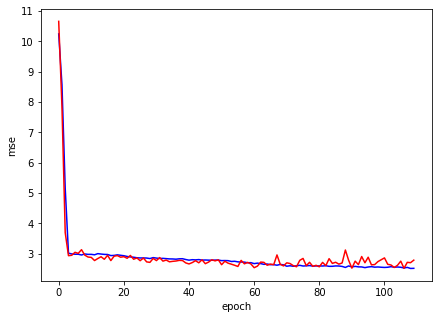

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(range(best_epochs), history.history['loss'], color= "b")
plt.plot(range(best_epochs), history.history['val_loss'], color= "r")

plt.xlabel('epoch')
plt.ylabel('mse')

plt.show()

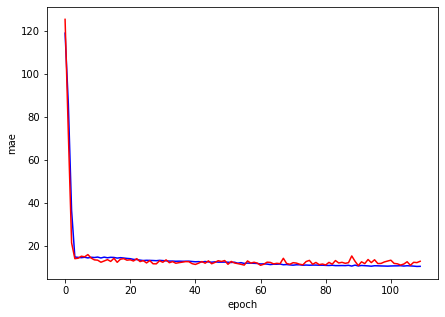

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(range(best_epochs), history.history['mean_squared_error'], color= "b")
plt.plot(range(best_epochs), history.history['val_mean_squared_error'], color= "r")

plt.xlabel('epoch')
plt.ylabel('mae')

plt.show()

### Reccomend : You can change number of neurons in first layer in Grid Search to eg. [16,32,64]

Apparently los main file :/
